<a href="https://colab.research.google.com/github/khrnnisak/PCVK_Genap_2023/blob/master/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
img_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

## Median Filtering

In [17]:

img = cv.imread('image.jpg', 0)




def MedianFiltering(img, kernel_size):
  height, width = img.shape

  new_img = img.copy()

  for i in range(kernel_size//2, height-kernel_size//2):
      for j in range(kernel_size//2, width-kernel_size//2):
          kernel = []
          for x in range(i-kernel_size//2, i+kernel_size//2+1):
              for y in range(j-kernel_size//2, j+kernel_size//2+1):
                  kernel.append(img[x][y])
          kernel.sort()

          if kernel_size % 2 == 0:
              median = (kernel[kernel_size//2-1] + kernel[kernel_size//2])/2
          else:
              median = kernel[kernel_size//2]

          new_img[i, j] = median

  final_frame = cv.hconcat((img, new_img)) 
  cv2_imshow(final_frame)

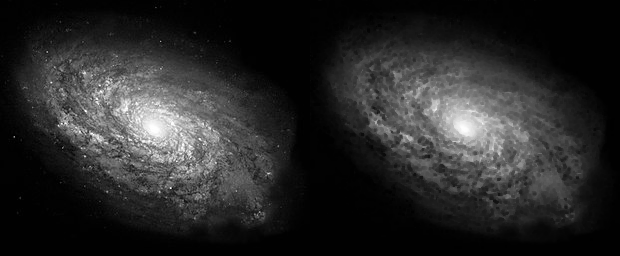

In [18]:
MedianFiltering(img_gray, 3)

## Mean Filtering

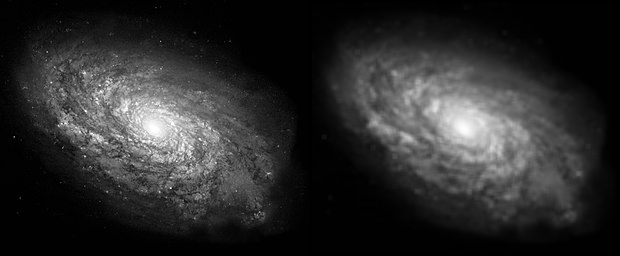

In [5]:

m, n = img_gray.shape

# Develop Averaging filter(5, 5) mask
mask = np.ones([5, 5], dtype=int)
mask = mask / 25

# Convolve the 5x5 mask over the image
img_new = np.zeros([m, n])

for i in range(2, m-2):
    for j in range(2, n-2):
        temp = 0
        for k in range(-2, 3):
            for l in range(-2, 3):
                a = img_gray[i+k, j+l]
                w = mask[k+2, l+2]
                temp += (w * a)
        img_new[i, j] = temp

img_new = img_new.astype(np.uint8)
final_frame1 = cv.hconcat((img_gray, img_new)) 
cv2_imshow(final_frame1)


## Modus Filtering

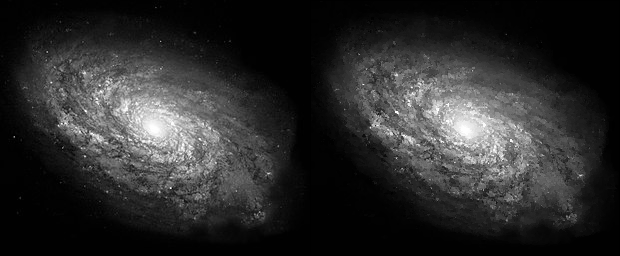

In [6]:

img_arr = np.array(img_gray)
kernel_size = 3
pad_width = kernel_size // 2
padded_arr = np.pad(img_arr, pad_width=pad_width, mode='edge')
output_arr = np.zeros_like(img_arr)

for i in range(1, img_arr.shape[0] - 1):
    for j in range(1, img_arr.shape[1] - 1):
        window = [padded_arr[i-1, j-1], padded_arr[i-1, j], padded_arr[i-1, j+1],
                  padded_arr[i, j-1], padded_arr[i, j], padded_arr[i, j+1],
                  padded_arr[i+1, j-1], padded_arr[i+1, j], padded_arr[i+1, j+1]]
        
        freq_dict = {}
        for pixel in window:
            if pixel in freq_dict:
                freq_dict[pixel] += 1
            else:
                freq_dict[pixel] = 1
        # Find pixel value with maximum frequency
        mode = max(freq_dict, key=freq_dict.get)
        output_arr[i, j] = mode

# Convert output array to image
output_img = im.fromarray(output_arr)
output_arr_cv = np.array(output_img)
final_frame2 = cv.hconcat((img_gray, output_arr_cv)) 
cv2_imshow(final_frame2)


In [7]:
def convolution2d(img, kernel, stride=1, padding=0):
  image = np.pad(img, ((padding, padding), (padding, padding)), 'constant')

  kernel_height, kernel_width = kernel.shape
  image_height, image_width = image.shape

  output_height = int((image_height - kernel_height) / stride + 1)
  output_width = int((image_width - kernel_width) / stride + 1)

  result = np.zeros((output_height, output_width), dtype=np.float32)
  
  for y in range(0, output_height):
    for x in range(0, output_width):
      result[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return result

## High Pass

In [8]:
padded_img_gray = np.pad(img_gray, ((1,1),(1,1)), mode='constant', constant_values=0)

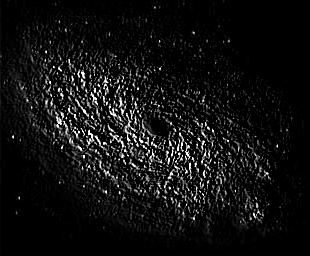

In [9]:

kernel_HP = np.array(
    [
        [-1, 0, 1],
        [-1, 0, 3],
        [-3, 0, 1]
    ]
)

hp = convolution2d(padded_img_gray, kernel_HP)
cv2_imshow(hp)

## Low Pass

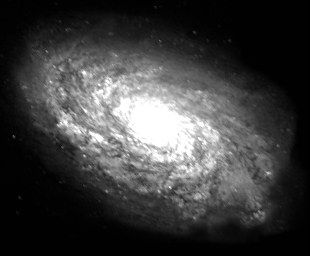

In [10]:

kernel_LP = np.array(
    [
        [1/12, 1/12, 1/12],
        [1/12, 4/12, 1/12],
        [1/12, 1/12, 1/2]
    ]
)

lp = convolution2d(padded_img_gray, kernel_LP)
cv2_imshow(lp)